In [1]:
import rdkit
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv',usecols=['Name','SMILES'])

In [3]:
df.head()

,Name,SMILES
0,Neomycin B,NC[C@@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@...
1,Paromomycin,NC[C@@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O[C@...
2,Sisomycin,CN[C@@H]1[C@@H](O)[C@@H](O[C@H]2[C@H](N)C[C@H]...
3,Streptomycin,CN[C@H]1[C@H](O)[C@@H](O)[C@H](CO)O[C@H]1O[C@H...
4,Tobramycin,NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H...


In [4]:
testids = [2,6,10,13,19,24,27,32,34,36,39,48]
testids = np.array(testids)-1
testids

array([ 1,  5,  9, 12, 18, 23, 26, 31, 33, 35, 38, 47])

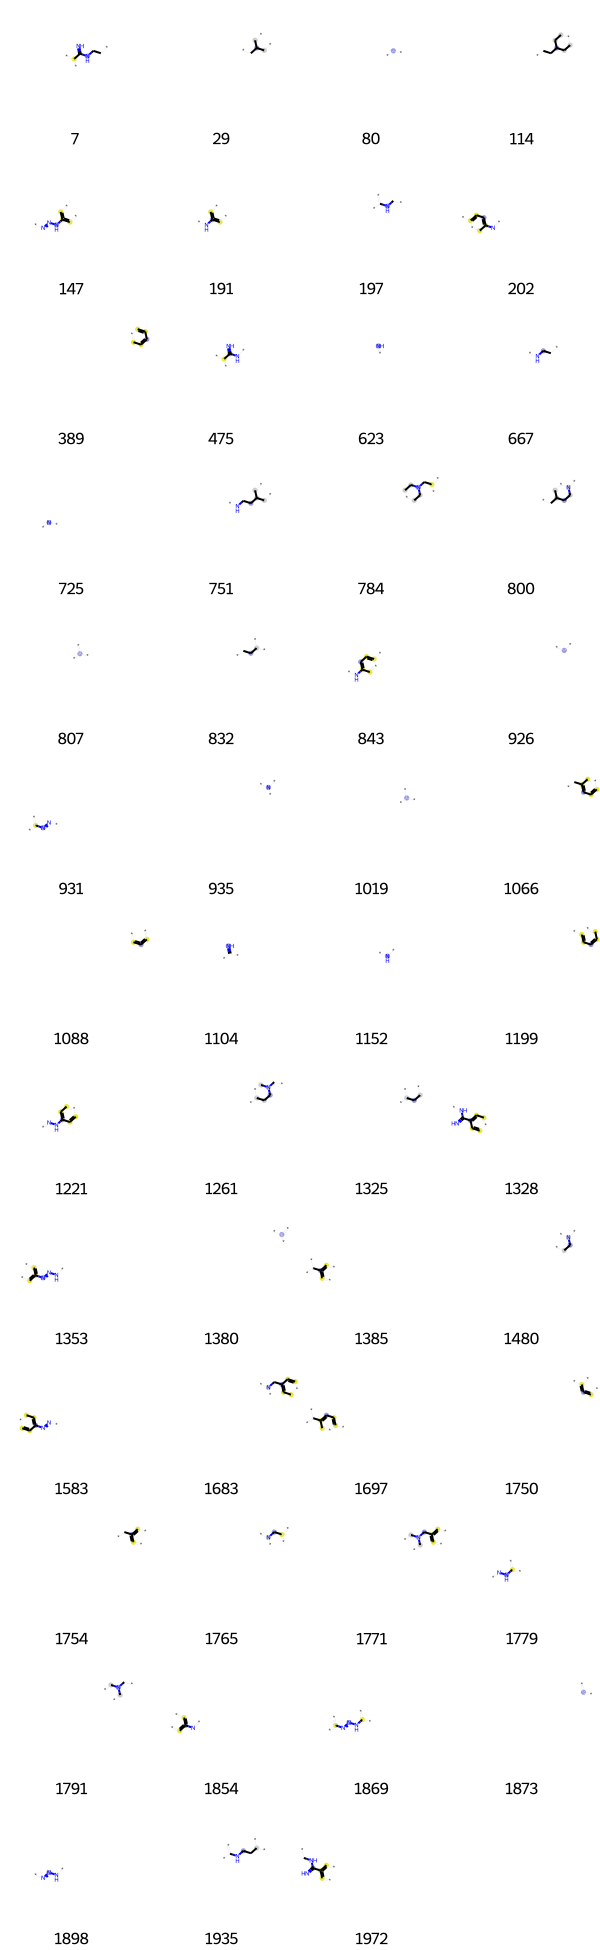

In [5]:
for testid in testids:
    bi = {}
    mol = AllChem.MolFromSmiles(df.SMILES[testid])
    fp_arr = np.zeros((1,2048))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits = 2048, bitInfo =bi)
    DataStructs.ConvertToNumpyArray(fp,fp_arr)
    prints = [(mol, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

In [98]:
results = np.zeros((len(df.SMILES),len(testids)))
for testid in testids:
    bi = {}
    mol_target = AllChem.MolFromSmiles(df.SMILES[testid])
    fp_target = AllChem.GetMorganFingerprintAsBitVect(mol_target,2,nBits = 2048, bitInfo =bi)
    for i in range(48):
        bi_compare = {}
        mol_compare = AllChem.MolFromSmiles(df.SMILES[i])
        fp_compare = AllChem.GetMorganFingerprintAsBitVect(mol_compare,2,nBits = 2048, bitInfo =bi_compare)
        tanimotocoef = DataStructs.TanimotoSimilarity(fp_target,fp_compare)
        results[i,np.where(testids==testid)] = tanimotocoef

In [118]:
lists = df.Name[testids].to_list()
results_df = pd.DataFrame(results,columns=lists)
results_df

,Paromomycin,Gentamicin,DMA-1,DMA-164,DMA-193,DPF p1,H-33258,DCC-3q,Thiazole Orange (tosylate),DPF m9,DPF p15,Bernil p13
0,0.976190,0.240000,0.027027,0.047619,0.053571,0.041096,0.024390,0.031915,0.000000,0.063291,0.060241,0.045455
1,1.000000,0.236842,0.026667,0.047059,0.053097,0.040541,0.024096,0.031579,0.000000,0.062500,0.059524,0.044944
2,0.250000,0.544118,0.060241,0.075269,0.083333,0.086420,0.054945,0.068627,0.029412,0.078652,0.086957,0.072165
3,0.253165,0.197802,0.069767,0.072165,0.072000,0.082353,0.020408,0.066038,0.038095,0.075269,0.061224,0.058824
4,0.566038,0.291667,0.027027,0.047619,0.053571,0.041096,0.024390,0.031915,0.000000,0.063291,0.060241,0.045455
5,0.236842,1.000000,0.060976,0.064516,0.057377,0.048193,0.032609,0.038462,0.009709,0.043956,0.064516,0.051020
6,0.688889,0.283582,0.029851,0.051948,0.057143,0.045455,0.026667,0.034483,0.000000,0.054795,0.065789,0.049383
7,0.653061,0.281690,0.027778,0.048780,0.054545,0.042254,0.025000,0.032609,0.000000,0.064935,0.061728,0.046512
8,0.455882,0.238636,0.057471,0.072165,0.072000,0.045455,0.020408,0.056075,0.009259,0.063830,0.072165,0.048544
9,0.026667,0.060976,1.000000,0.490909,0.244444,0.093750,0.068493,0.491803,0.035714,0.054054,0.064935,0.048780


In [127]:
results_df = results_df.merge(df[["Name"]], left_index=True, right_index=True).set_index("Name")

,Paromomycin,Gentamicin,DMA-1,DMA-164,DMA-193,DPF p1,H-33258,DCC-3q,Thiazole Orange (tosylate),DPF m9,DPF p15,Bernil p13
Name,,,,,,,,,,,,
Neomycin B,0.976190,0.240000,0.027027,0.047619,0.053571,0.041096,0.024390,0.031915,0.000000,0.063291,0.060241,0.045455
Paromomycin,1.000000,0.236842,0.026667,0.047059,0.053097,0.040541,0.024096,0.031579,0.000000,0.062500,0.059524,0.044944
Sisomycin,0.250000,0.544118,0.060241,0.075269,0.083333,0.086420,0.054945,0.068627,0.029412,0.078652,0.086957,0.072165
Streptomycin,0.253165,0.197802,0.069767,0.072165,0.072000,0.082353,0.020408,0.066038,0.038095,0.075269,0.061224,0.058824
Tobramycin,0.566038,0.291667,0.027027,0.047619,0.053571,0.041096,0.024390,0.031915,0.000000,0.063291,0.060241,0.045455
Gentamicin,0.236842,1.000000,0.060976,0.064516,0.057377,0.048193,0.032609,0.038462,0.009709,0.043956,0.064516,0.051020
Neamine,0.688889,0.283582,0.029851,0.051948,0.057143,0.045455,0.026667,0.034483,0.000000,0.054795,0.065789,0.049383
Kanamycin,0.653061,0.281690,0.027778,0.048780,0.054545,0.042254,0.025000,0.032609,0.000000,0.064935,0.061728,0.046512
Amikacin,0.455882,0.238636,0.057471,0.072165,0.072000,0.045455,0.020408,0.056075,0.009259,0.063830,0.072165,0.048544


In [130]:
results_df.to_csv('testset_NN_MorganFp_Tanimoto.csv')